In [6]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, ndcg_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [7]:
df = pd.read_csv("../datasets/resources.csv")

difficulty_map = {'easy': 1, 'medium': 2, 'hard': 3}
df['difficulty_encoded'] = df['difficulty'].map(difficulty_map)

type_map = {'video': 0, 'article': 1}
df['type_encoded'] = df['type'].map(type_map)

df['score'] = df['rating'] * df['popularity']

df.head()


,resource_id,title,url,topic,length,type,difficulty,popularity,rating,difficulty_encoded,type_encoded,score
0,1,Python Basics YouTube,https://youtube.com/python_basics,Introduction to Python,15,video,easy,50000,4.5,1,0,225000.0
1,2,Python Official Docs,https://python.org/docs,Introduction to Python,60,article,medium,30000,4.0,2,1,120000.0
2,3,Data Structures Playlist,https://youtube.com/data_structures,Data Structures,120,video,medium,40000,4.3,2,0,172000.0
3,4,DSA Blog,https://dsa-blog.com,Data Structures,20,article,hard,10000,3.8,3,1,38000.0
4,5,OOP Concepts Course,https://course.com/oop,OOP Concepts,180,video,medium,25000,4.2,2,0,105000.0


In [8]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   resource_id         12 non-null     int64  
 1   title               12 non-null     object 
 2   url                 12 non-null     object 
 3   topic               12 non-null     object 
 4   length              12 non-null     int64  
 5   type                12 non-null     object 
 6   difficulty          12 non-null     object 
 7   popularity          12 non-null     int64  
 8   rating              12 non-null     float64
 9   difficulty_encoded  12 non-null     int64  
 10  type_encoded        12 non-null     int64  
 11  score               12 non-null     float64
dtypes: float64(2), int64(5), object(5)
memory usage: 1.3+ KB


resource_id           0
title                 0
url                   0
topic                 0
length                0
type                  0
difficulty            0
popularity            0
rating                0
difficulty_encoded    0
type_encoded          0
score                 0
dtype: int64

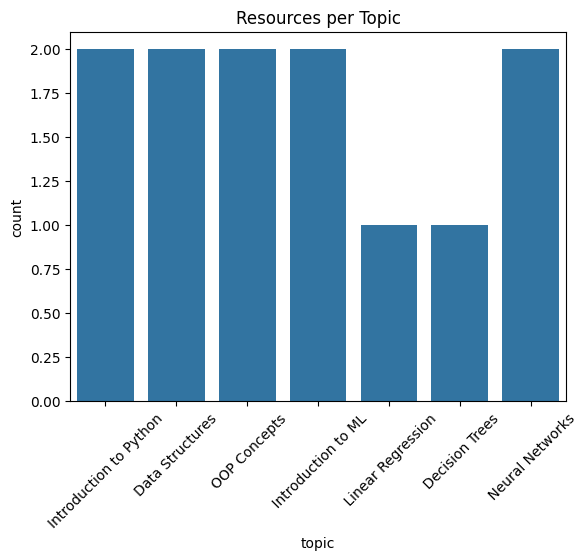

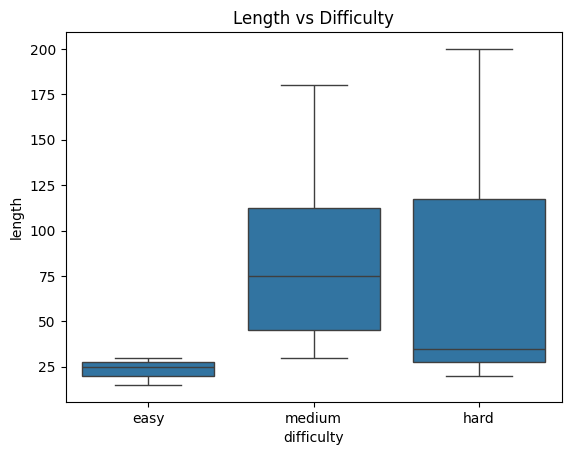

In [9]:
sns.countplot(x="topic", data=df)
plt.title("Resources per Topic")
plt.xticks(rotation=45)
plt.show()

sns.boxplot(x="difficulty", y="length", data=df)
plt.title("Length vs Difficulty")
plt.show()


In [10]:
X = df[['length', 'difficulty_encoded', 'type_encoded', 'popularity', 'rating']]
y = df['score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.head()


,length,difficulty_encoded,type_encoded,popularity,rating
8,40,2,1,17000,4.2
5,30,1,1,12000,4.0
2,120,2,0,40000,4.3
1,60,2,1,30000,4.0
11,35,3,1,9000,4.0


In [11]:
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=4, learning_rate=0.1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error with XGBoost: {mse:.2f}")


Mean Squared Error with XGBoost: 7764365391.93


In [12]:
y_true = y_test.values.reshape(1, -1)
y_pred_reshaped = y_pred.reshape(1, -1)

ndcg = ndcg_score(y_true, y_pred_reshaped)
print(f"NDCG Score: {ndcg:.4f}")


NDCG Score: 0.8584


In [13]:
import joblib

joblib.dump(model, '../models/xgb_ranker.pkl')
print("XGBoost model saved successfully.")


XGBoost model saved successfully.
